In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 5s 0us/step


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # 10 outputs for 10 categories

In [3]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5111 - accuracy: 0.4485 - val_loss: 1.3462 - val_accuracy: 0.5197
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1354 - accuracy: 0.5973 - val_loss: 1.0671 - val_accuracy: 0.6257
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9854 - accuracy: 0.6553 - val_loss: 1.0077 - val_accuracy: 0.6516
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8922 - accuracy: 0.6882 - val_loss: 0.9068 - val_accuracy: 0.6791
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8245 - accuracy: 0.7118 - val_loss: 0.9596 - val_accuracy: 0.6669
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7635 - accuracy: 0.7331 - val_loss: 0.8942 - val_accuracy: 0.6942
Epoch 7/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7150 - accuracy: 0.7472 - val_loss: 0.8794 -

313/313 - 1s - loss: 0.9157 - accuracy: 0.6993 - 1s/epoch - 4ms/step
Final Accuracy: 69.93%


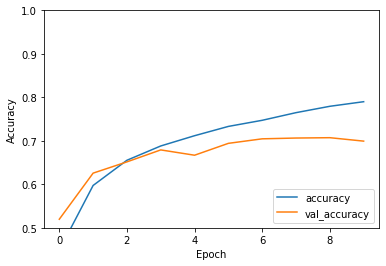

In [4]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Final Accuracy: {test_acc*100:.2f}%")

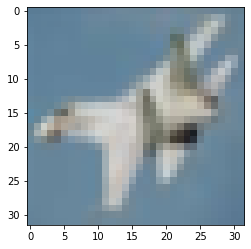

1/1 [==============================] - 0s 105ms/step
Actual Label: airplane
Model Prediction: airplane


In [5]:
import numpy as np

# Choose an image index
img_idx = 10 
plt.imshow(test_images[img_idx])
plt.show()

# Predict!
prediction = model.predict(test_images[img_idx].reshape(1, 32, 32, 3))
predicted_label = np.argmax(prediction)

print(f"Actual Label: {class_names[test_labels[img_idx][0]]}")
print(f"Model Prediction: {class_names[predicted_label]}")

313/313 [==============================] - 1s 4ms/step


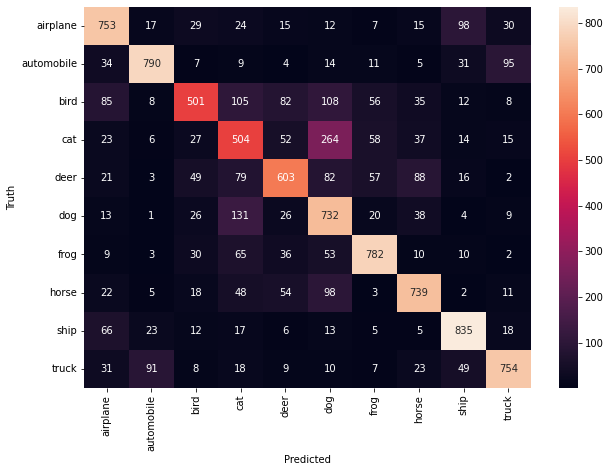

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]

cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()